In [33]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
dataset_path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/autos/autos.csv'
raw_dataset = pd.read_csv(dataset_path, na_values = "?")
dataset = raw_dataset.copy()
dataset.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [35]:
dataset = dataset.dropna()

In [36]:
len(dataset)

159

In [37]:
dataset.pop('make')
dataset.pop('fuel-type')
dataset.pop('aspiration')
dataset.pop('body-style')
dataset.pop('drive-wheels')
dataset.pop('engine-location')
dataset.pop('engine-type')
dataset.pop('fuel-system')
dataset.pop('num-of-doors')
dataset.pop('num-of-cylinders')

3      four
4      five
6      five
8      five
10     four
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 159, dtype: object

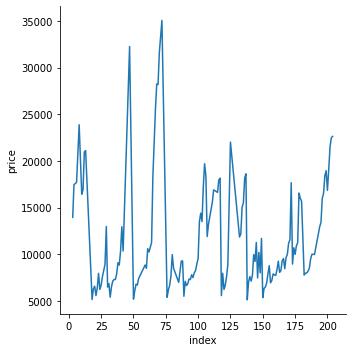

In [38]:
sns.relplot(x='index', y='price', kind='line', data=dataset.reset_index())

In [39]:
dataset.tail()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [40]:
train_dataset = dataset[:80]
test_dataset = dataset[80:]

In [41]:
len(train_dataset)

80

In [42]:
len(test_dataset)

79

In [43]:
train_dataset.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


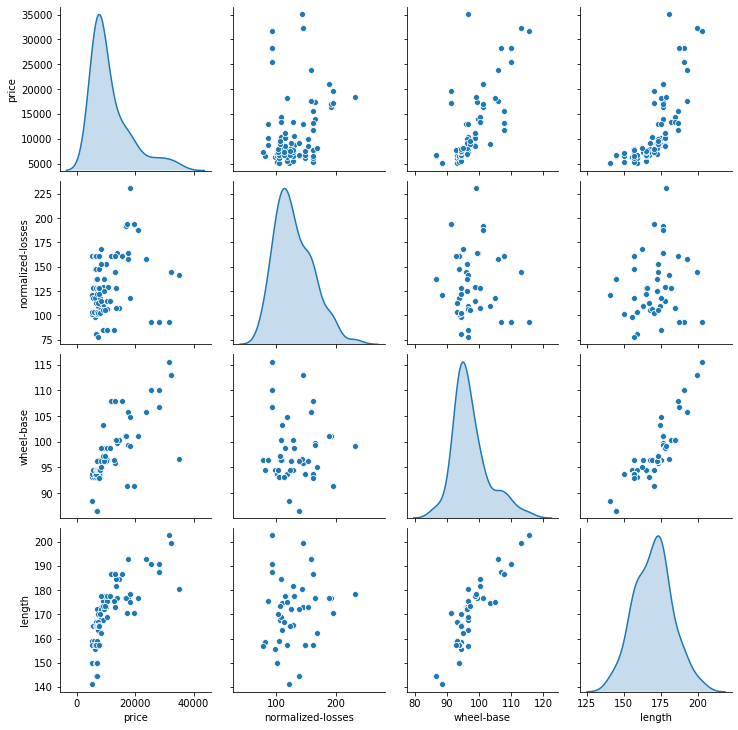

In [44]:
sns.pairplot(train_dataset[["price", "normalized-losses", "wheel-base", "length"]], diag_kind="kde")

In [45]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
symboling,80.0,0.837500,0.986539,-1.00,0.00,1.00,1.00,3.00
normalized-losses,80.0,129.900000,31.433917,78.00,106.00,125.00,153.00,231.00
wheel-base,80.0,97.445000,5.544113,86.60,93.70,96.30,99.50,115.60
length,80.0,170.157500,12.620816,141.10,159.10,171.55,177.05,202.60
width,80.0,65.516250,2.240448,60.30,63.80,64.80,66.50,71.70
height,80.0,53.420000,2.264386,49.40,51.45,54.10,54.50,59.80
curb-weight,80.0,2404.950000,559.082293,1488.00,1954.75,2314.00,2723.75,4066.00
engine-size,80.0,120.087500,36.897461,61.00,92.00,110.00,124.25,258.00
bore,80.0,3.217625,0.222541,2.91,3.03,3.15,3.39,3.76
stroke,80.0,3.335125,0.241792,2.19,3.23,3.34,3.46,4.17


In [46]:
def scale(x):
  return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])
scaled_train_data = scale(train_dataset)
scaled_test_data = scale(test_dataset)

In [47]:
scaled_train_data.tail()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
105,1.00,0.758170,0.162069,0.481301,0.666667,0.028846,0.640419,0.609137,0.611765,0.545455,0.053691,1.000000,0.567568,0.058824,0.138889,0.486474
106,0.50,1.000000,0.434483,0.608130,0.666667,0.028846,0.640419,0.609137,0.611765,0.545455,0.134228,0.736842,0.567568,0.117647,0.194444,0.443003
107,0.25,0.542484,0.734483,0.741463,0.710526,0.701923,0.594259,0.299492,0.647059,0.505051,0.093960,0.322368,0.459459,0.117647,0.166667,0.225681
108,0.25,0.542484,0.734483,0.741463,0.710526,0.701923,0.662917,0.461929,0.929412,0.671717,0.939597,0.309211,0.000000,0.382353,0.416667,0.269152
111,0.25,0.542484,0.734483,0.741463,0.710526,0.701923,0.615593,0.299492,0.647059,0.000000,0.093960,0.309211,0.459459,0.117647,0.166667,0.348738


In [48]:
train_labels = scaled_train_data.pop('price')
test_labels = scaled_test_data.pop('price')

In [49]:
path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/autos/data/'
np.savetxt(path + 'X_train.csv', scaled_train_data)
np.savetxt(path + 'X_test.csv', scaled_test_data)
np.savetxt(path + 'Y_train.csv', train_labels)
np.savetxt(path + 'Y_test.csv', test_labels)